## blending して postprocessing する

In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

### sub を作る
 * load
 * ゼロ埋め
 * blending 

#### load

In [2]:
def load_subs(path_list):
    res_list = [pd.read_csv(path) for path in path_list]
    return res_list

In [3]:
lgb_path = [
#    '../submissions/Booster_weight-multi-logloss-0.522158_2018-12-16-08-40-18.csv',
#    '../submissions/Booster_weight-multi-logloss-0.528889_2018-12-16-08-40-18.csv',
#    '../submissions/Booster_weight-multi-logloss-0.521726_2018-12-16-08-40-18.csv',
#    '../submissions/Booster_weight-multi-logloss-0.527_2018-12-16-08-40-18.csv',
#    '../submissions/Booster_weight-multi-logloss-0.518228_2018-12-16-08-40-18.csv',
    '../submissions/Booster_weight-multi-logloss-0.500027_2018-12-17-13-49-19.csv',
    '../submissions/Booster_weight-multi-logloss-0.5041_2018-12-17-13-49-19.csv',
    '../submissions/Booster_weight-multi-logloss-0.506028_2018-12-17-13-49-19.csv',
    '../submissions/Booster_weight-multi-logloss-0.507597_2018-12-17-13-49-19.csv',
    '../submissions/Booster_weight-multi-logloss-0.511058_2018-12-17-13-49-19.csv',
]

nn_path = [
#    '../submissions/PLASTICC_NET_weight-multi-logloss-0.537692.csv',
#    '../submissions/PLASTICC_NET_weight-multi-logloss-0.535849.csv',
#    '../submissions/PLASTICC_NET_weight-multi-logloss-0.538699.csv',
#    '../submissions/PLASTICC_NET_weight-multi-logloss-0.536509.csv',
#    '../submissions/PLASTICC_NET_weight-multi-logloss-0.532764.csv',
    '../submissions/PLASTICC_NET_weight-multi-logloss-0.500707_taguchi_nn_last.csv',
    '../submissions/PLASTICC_NET_weight-multi-logloss-0.501635_taguchi_nn_last.csv',
    '../submissions/PLASTICC_NET_weight-multi-logloss-0.501833_taguchi_nn_last.csv',
    '../submissions/PLASTICC_NET_weight-multi-logloss-0.503846_taguchi_nn_last.csv',
    '../submissions/PLASTICC_NET_weight-multi-logloss-0.503938_taguchi_nn_last.csv',
]

paths = lgb_path + nn_path

sub_df_list = load_subs(paths)

#### 一旦 class 99 を落とす

In [4]:
dropped_sub_df_list = [_df.drop('class_99', axis=1) for _df in sub_df_list]

#### ie eg zero padding 

In [5]:
meta_df = pd.read_csv('/home/naoya.taguchi/.kaggle/competitions/PLAsTiCC-2018/test_set_metadata.csv')
meta_df

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
0,13,34.453125,-5.229529,169.987075,-59.956185,1,0.3048,0.3193,0.0542,41.1123,0.019
1,14,33.398438,-4.331149,167.226341,-59.936551,1,NaN,0.6323,0.0179,42.8774,0.018
2,17,348.529419,-61.755440,321.293980,-51.763351,1,NaN,0.8297,0.0605,43.6000,0.016
3,23,34.804688,-5.829153,171.307861,-60.174401,1,NaN,0.6533,0.1479,42.9640,0.023
4,34,351.321442,-64.198746,317.458993,-50.429931,1,0.4557,0.4617,0.0122,42.0540,0.023
5,35,35.332031,-5.979157,172.286722,-59.931743,1,NaN,0.8388,0.0375,43.6290,0.022
6,43,0.574468,-45.981140,327.041068,-68.778764,1,NaN,0.6669,0.0546,43.0186,0.006
7,50,0.574468,-45.981140,327.041068,-68.778764,1,NaN,1.4663,0.0529,45.1281,0.006
8,60,346.562500,-63.448284,320.824720,-49.866957,1,NaN,0.9462,0.0116,43.9519,0.021
9,69,349.160583,-64.760857,318.219706,-49.458924,1,NaN,1.0432,0.1092,44.2138,0.020


In [6]:
padded_df_list = []

for _df in dropped_sub_df_list:
    _df.loc[_df[meta_df.distmod.isnull()].index, ['class_15', 'class_42', 'class_52', 'class_62', 'class_64', 'class_67', 'class_88', 'class_90', 'class_95']] = 0.
    _df.loc[_df[meta_df.distmod.notnull()].index, ['class_6', 'class_16', 'class_53', 'class_65', 'class_92']] = 0.
    padded_df_list.append(_df)

In [7]:
classes = ['class_6', 'class_15', 'class_16', 'class_42', 'class_52', 'class_53', 'class_62', 'class_64', 'class_65', 'class_67', 'class_88', 'class_90', 'class_92', 'class_95']

scaled_padded_df_list = []

for _df in padded_df_list:
    sum_row =  _df[classes].sum(axis=1)
    for _class in classes:
        _df[_class] = _df[_class] / sum_row
    scaled_padded_df_list.append(_df)    

#### blending them all

In [8]:
blended_df = scaled_padded_df_list[0].set_index('object_id')
for _df in scaled_padded_df_list[1:]:
    _df = _df.set_index('object_id')
    blended_df += _df
blended_df /= len(scaled_padded_df_list)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90a8085a90>,
      dtype=object)

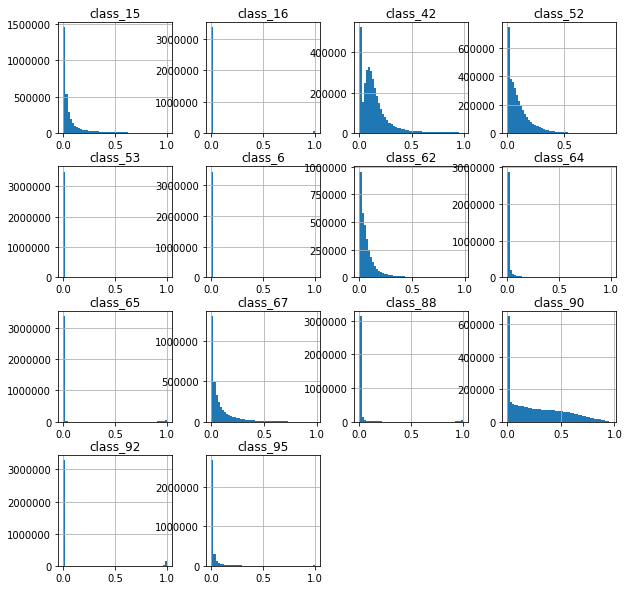

In [9]:
blended_df.hist(figsize=(10, 10), bins=50)

### oof を加工

#### 関数定義

In [65]:
def softmax(x, axis=1):
    z = np.exp(x)
    return z/np.sum(z, axis=axis, keepdims=True)

def multi_weighted_logloss(y_true:np.array, y_preds:np.array):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    # class_weights taken from Giba's topic : https://www.kaggle.com/titericz
    # https://www.kaggle.com/c/PLAsTiCC-2018/discussion/67194
    # with Kyle Boone's post https://www.kaggle.com/kyleboone
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    if len(np.unique(y_true)) > 14:
        classes.append(99)
        class_weight[99] = 2
        
    y_p = y_preds/y_preds.sum(1)[:,None]
    # Trasform y_true in dummies
    y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1 - 1e-15)
    # Transform to log
    y_p_log = np.log(y_p)
    # Get the log for ones, .values is used to drop the index of DataFrames
    # Exclude class 99 for now, since there is no class99 in the training set
    # we gave a special process for that class
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos

    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    classes = ['class_' + str(clnum)
                for clnum in [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]]
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    cm_df[cm_df.columns] = cm_df.values / cm_df.sum(axis=1).values.reshape(-1, 1)
    plt.figure(figsize=(14, 14))
    fig = sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues, fmt='.2f')
    fig.set_yticklabels(classes, rotation=30)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.title(title)

#### load

In [11]:
def load_oofs(path_list):
    res_list = [pd.read_pickle(path) for path in path_list]
    return res_list

In [51]:
lgb_path = [
#    '../oof/Booster_weight-multi-logloss-0.522158_2018-12-16-08-40-18.pkl',
#    '../oof/Booster_weight-multi-logloss-0.528889_2018-12-16-08-40-18.pkl',
#    '../oof/Booster_weight-multi-logloss-0.521726_2018-12-16-08-40-18.pkl',
#    '../oof/Booster_weight-multi-logloss-0.527_2018-12-16-08-40-18.pkl',
#    '../oof/Booster_weight-multi-logloss-0.518228_2018-12-16-08-40-18.pkl',
    '../oof/Booster_weight-multi-logloss-0.500027_2018-12-17-13-49-19.pkl',
    '../oof/Booster_weight-multi-logloss-0.5041_2018-12-17-13-49-19.pkl',
    '../oof/Booster_weight-multi-logloss-0.506028_2018-12-17-13-49-19.pkl',
    '../oof/Booster_weight-multi-logloss-0.507597_2018-12-17-13-49-19.pkl',
    '../oof/Booster_weight-multi-logloss-0.511058_2018-12-17-13-49-19.pkl',
]

nn_path = [
#    '../oof/PLASTICC_NET_weight-multi-logloss-0.537692.pkl',
#    '../oof/PLASTICC_NET_weight-multi-logloss-0.535849.pkl',
#    '../oof/PLASTICC_NET_weight-multi-logloss-0.538699.pkl',
#    '../oof/PLASTICC_NET_weight-multi-logloss-0.536509.pkl',
#    '../oof/PLASTICC_NET_weight-multi-logloss-0.532764.pkl',
    '../oof/PLASTICC_NET_weight-multi-logloss-0.500707_taguchi_nn_last_taguchi_nn_last.pkl',
    '../oof/PLASTICC_NET_weight-multi-logloss-0.501635_taguchi_nn_last_taguchi_nn_last.pkl',
    '../oof/PLASTICC_NET_weight-multi-logloss-0.501833_taguchi_nn_last_taguchi_nn_last.pkl',
    '../oof/PLASTICC_NET_weight-multi-logloss-0.503846_taguchi_nn_last_taguchi_nn_last.pkl',
    '../oof/PLASTICC_NET_weight-multi-logloss-0.503938_taguchi_nn_last_taguchi_nn_last.pkl',
]

paths = lgb_path + nn_path
#paths = lgb_path 
#paths = nn_path 

oof_list = load_oofs(paths)

#### oof を整理

In [37]:
def calibrate_oof(oofs):
    _oof_df_list = []
    for oof in oofs:
        preds = softmax(oof[0])
        #preds = oof[0]
        target = oof[1]
        object_id = oof[2]
        _oof_df = pd.DataFrame(
            preds,
#            np.concatenate([object_id.reshape(1, -1), target.reshape(1, -1), preds], axis=0), 
            columns=[
#                'object_id',
#                'target',
                'class_6',
                'class_15',
                'class_16',
                'class_42',
                 'class_52',
                 'class_53',
                 'class_62',
                 'class_64',
                 'class_65',
                 'class_67',
                 'class_88',
                 'class_90',
                 'class_92',
                 'class_95'
            ]
        )
        _oof_df['object_id'] = object_id
        _oof_df['target'] = target
        _oof_df_list.append(_oof_df)
    oof_df = pd.concat(_oof_df_list).sort_values('object_id').set_index('object_id')
    return oof_df 

In [52]:
oof_df_list = [calibrate_oof(oofs) for oofs in oof_list]

In [53]:
# oof は正しそう
temp_df = oof_df_list[4]
temp_df2 = oof_df_list[9]
multi_weighted_logloss(temp_df.target.values, temp_df[classes].values, ), multi_weighted_logloss(temp_df2.target.values, temp_df2[classes].values, )

(0.5110560808735856, 0.5037476817508366)

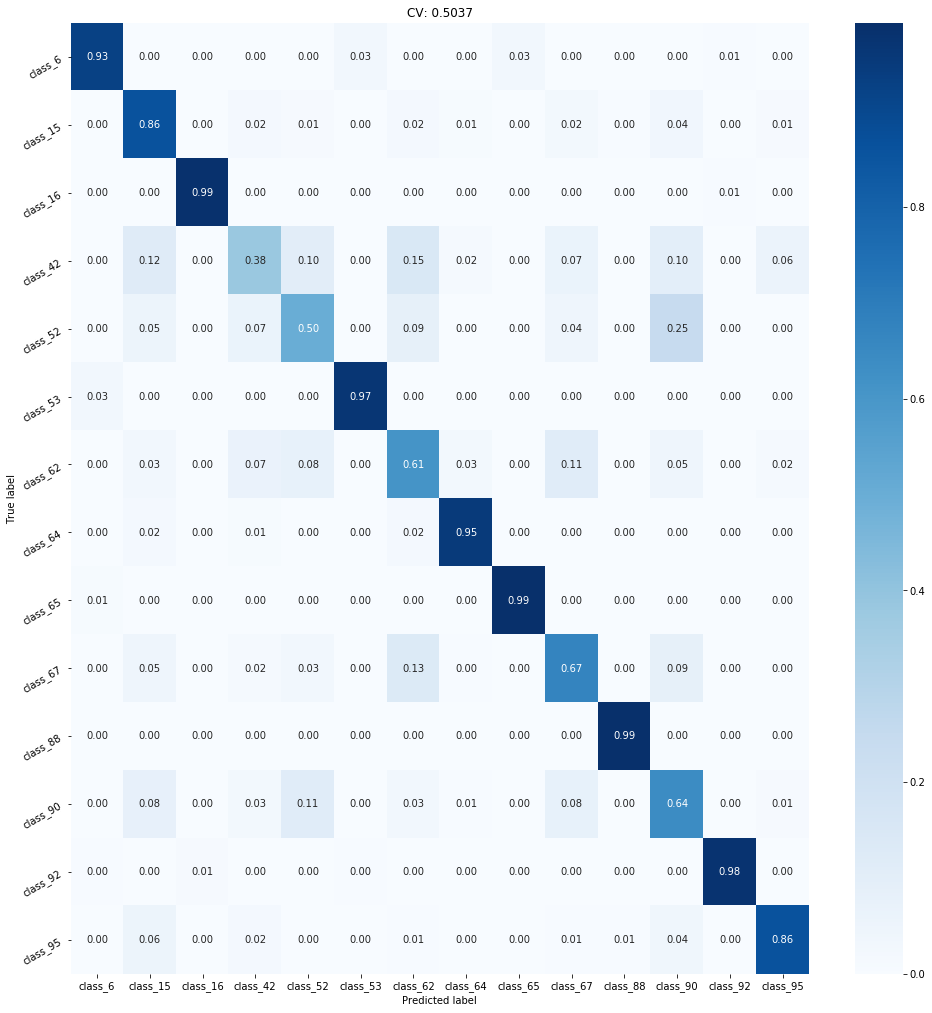

In [29]:
plot_cm(temp_df2.target.values, np.argmax(temp_df2[classes].values, axis=1), title=f'CV: {multi_weighted_logloss(temp_df2.target.values, temp_df2[classes].values, ):.4}')

#### ie eg zero padding 

In [30]:
oof_meta_df = pd.read_csv('/home/naoya.taguchi/.kaggle/competitions/PLAsTiCC-2018/training_set_metadata.csv')
oof_meta_df

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0000,0.0000,0.0000,NaN,0.020,65
6,1598,347.846710,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,0.019,90
7,1632,348.595886,-63.072620,320.023289,-50.713060,1,0.6857,0.7014,0.0100,43.1524,0.021,42
8,1920,149.414062,3.433834,234.919132,42.245550,1,0.3088,0.3229,0.3360,41.1401,0.027,90
9,1926,149.414062,1.940072,236.565366,41.393323,1,0.0000,0.0000,0.0000,NaN,0.018,65


In [54]:
padded_oof_df_list = []

for _df in oof_df_list:
    _df.loc[_df[oof_meta_df.distmod.isnull()].index, ['class_15', 'class_42', 'class_52', 'class_62', 'class_64', 'class_67', 'class_88', 'class_90', 'class_95']] = 0.
    _df.loc[_df[oof_meta_df.distmod.notnull()].index, ['class_6', 'class_16', 'class_53', 'class_65', 'class_92']] = 0.
    padded_oof_df_list.append(_df)

In [55]:
classes = ['class_6', 'class_15', 'class_16', 'class_42', 'class_52', 'class_53', 'class_62', 'class_64', 'class_65', 'class_67', 'class_88', 'class_90', 'class_92', 'class_95']

scaled_padded_oof_df_list = []

for _df in padded_oof_df_list:
    sum_row =  _df[classes].sum(axis=1)
    for _class in classes:
        _df[_class] = _df[_class] / sum_row
    scaled_padded_oof_df_list.append(_df)    

#### blending them all

In [56]:
oof_blended_df = scaled_padded_oof_df_list[0]
for _df in scaled_padded_oof_df_list[1:]:
    _df = _df
    oof_blended_df += _df
oof_blended_df /= len(scaled_padded_oof_df_list)
oof_blended_df

,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95,target
object_id,,,,,,,,,,,,,,,
0,0.000049,0.000000,0.000824,0.000000,0.000000,0.000231,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000,0.998862,0.000000,12
1,0.000000,0.000022,0.000000,0.000029,0.000020,0.000000,0.000008,0.000011,0.000000,0.000007,0.999860,0.000013,0.000000,0.000031,10
2,0.000000,0.005502,0.000000,0.377723,0.033164,0.000000,0.311519,0.001204,0.000000,0.175616,0.001273,0.091719,0.000000,0.002280,3
3,0.000000,0.002893,0.000000,0.024676,0.293585,0.000000,0.006813,0.001089,0.000000,0.005799,0.001153,0.663098,0.000000,0.000894,11
4,0.000000,0.002709,0.000000,0.015831,0.268264,0.000000,0.007281,0.001053,0.000000,0.153271,0.005414,0.543939,0.000000,0.002237,11
5,0.001350,0.000000,0.000468,0.000000,0.000000,0.000160,0.000000,0.000000,0.997849,0.000000,0.000000,0.000000,0.000173,0.000000,8
6,0.000000,0.027116,0.000000,0.314606,0.035644,0.000000,0.008720,0.000862,0.000000,0.014118,0.000744,0.579463,0.000000,0.018727,11
7,0.000000,0.006315,0.000000,0.208686,0.010906,0.000000,0.089078,0.055360,0.000000,0.037805,0.010877,0.105846,0.000000,0.475126,3
8,0.000000,0.001919,0.000000,0.024331,0.277785,0.000000,0.007871,0.000704,0.000000,0.008189,0.000894,0.677219,0.000000,0.001088,11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f5c31f550>,
      dtype=object)

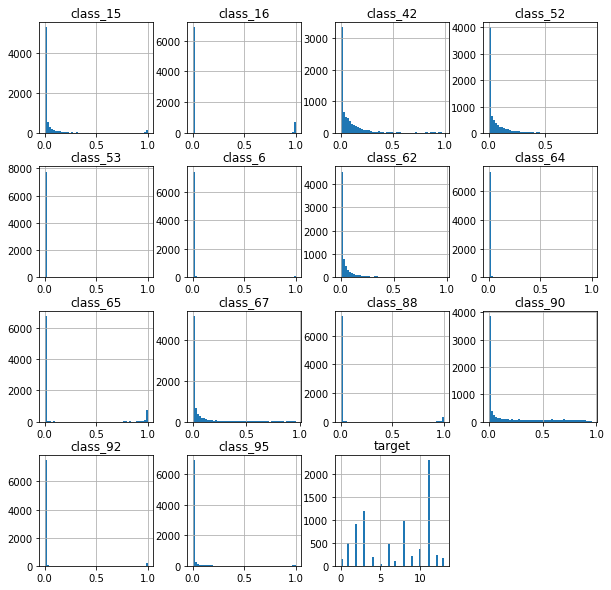

In [34]:
oof_blended_df.hist(figsize=(10, 10), bins=50)

In [305]:
# 2 best models
multi_weighted_logloss(oof_blended_df.reset_index().target.values, oof_blended_df[classes].values)

0.4754394922953572

In [42]:
# lgb
multi_weighted_logloss(oof_blended_df.reset_index().target.values, oof_blended_df[classes].values)

0.48103137666267265

In [49]:
# nn
multi_weighted_logloss(oof_blended_df.reset_index().target.values, oof_blended_df[classes].values)

0.48094279306536747

In [35]:
# all
multi_weighted_logloss(oof_blended_df.reset_index().target.values, oof_blended_df[classes].values)

0.4462924409117769

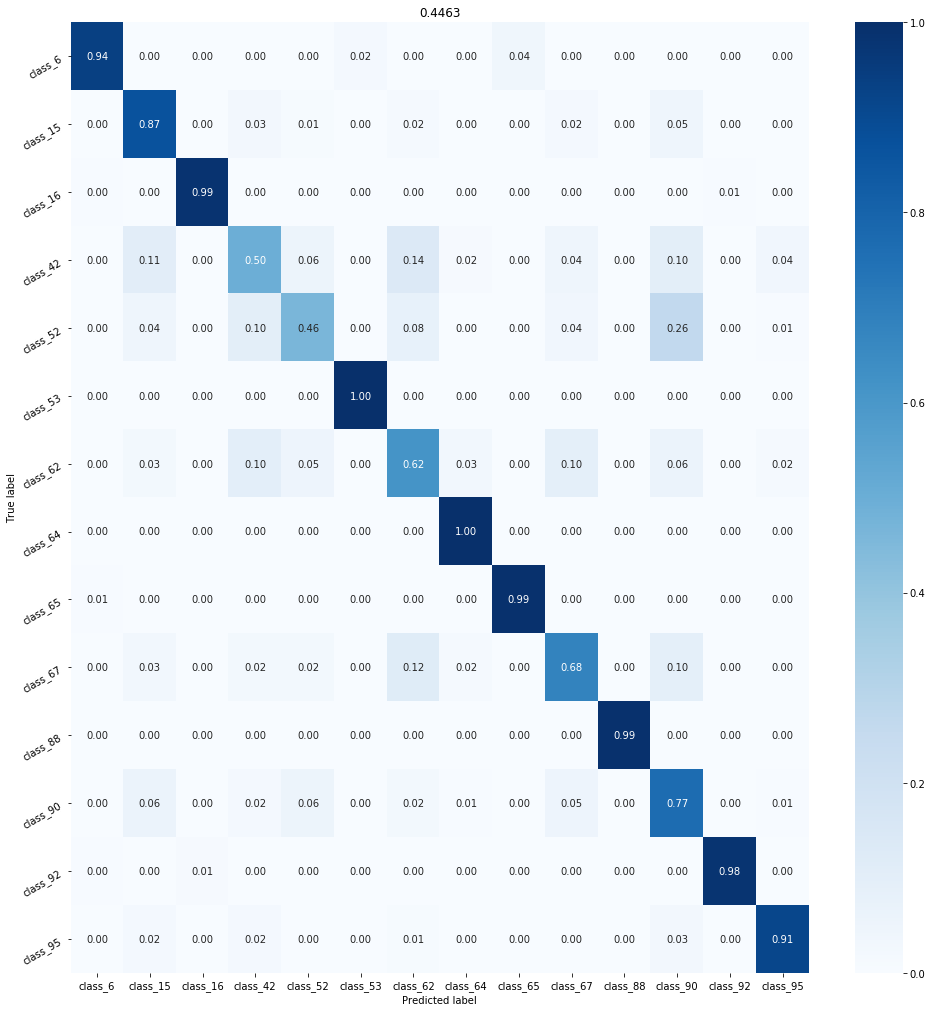

In [59]:
plot_cm(oof_blended_df.target.values, np.argmax(oof_blended_df[classes].values, axis=1), title=f'{multi_weighted_logloss(oof_blended_df.reset_index().target.values, oof_blended_df[classes].values):.4}')

### 謎 weight 算出

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#import os
#from multiprocessing import cpu_count, Pool
#import utils


def multi_weighted_logloss(y_true, y_pred, myweight=None, based_true=True):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    # class_weights taken from Giba's topic : https://www.kaggle.com/titericz
    # https://www.kaggle.com/c/PLAsTiCC-2018/discussion/67194
    # with Kyle Boone's post https://www.kaggle.com/kyleboone
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    if y_true.shape[1] > 14:
        classes.append(99)
        class_weight[99] = 2
    
    if myweight is None:
        myweight = np.ones(y_true.shape[1])
    y_p = y_pred * myweight
    
    # normalize
    y_p /= y_p.sum(1)[:,None]
    
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=0, a_max=1)
    # Transform to log
    y_p_log = np.log(y_p)
    # Get the log for ones, .values is used to drop the index of DataFrames
    # Exclude class 99 for now, since there is no class99 in the training set
    # we gave a special process for that class
    y_log_ones = np.sum(y_true * y_p_log, axis=0)
    
    # Get the number of positives for each class
    if based_true == True:
        nb_pos = y_true.sum(axis=0).astype(float)
    else:
        nb_pos = pd.DataFrame(y_pred).sum(axis=0).astype(float)
        
    
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos

    loss = - np.nansum(y_w) / np.sum(class_arr)
    return loss


def calc_gradient(f, X):
    """
    calc_gradient
    偏微分を行う関数
    関数fを変数xの各要素で偏微分した結果をベクトルにした勾配を返す
    
    @params
    f: 対象となる関数
    X: 関数fの引数のベクトル(numpy.array)
    
    @return
    gradient: 勾配(numpy.array)
    """
    
    h = 1e-4
    gradient = np.zeros_like(X)
    
    # 各変数についての偏微分を計算する
    for i in range(X.size):
        store_X = X[:]
        print(store_X)
        
        # f(x+h)
        X[i] += h
        f_x_plus_h = f(X)
        print(f_x_plus_h)

        X = store_X[:]
        print()
        
        # f(x-h)
        X[i] -= h
        f_x_minus_h = f(X)
        
        # 偏微分
        print(f_x_plus_h - f_x_minus_h)
        gradient[i] = (f_x_plus_h - f_x_minus_h) / (2 * h)
        
    return gradient

def gradient_descent(f, X, learning_rate, max_iter, is_print=True, verbose_eval=100):
    """
    gradient_descent
    最急降下法を行う関数
    
    @params
    f: 対象となる関数
    X: 関数fの引数のベクトル(numpy.array)
    learning_rate: 学習率
    max_iter: 繰り返し回数
    
    @return
    X: 関数の出力を最小にする(であろう)引数(numpy.array)
    """
    sw_break = False
    score_bk = 9999
    for i in range(max_iter):
        print(learning_rate * calc_gradient(f, X))
        X -= (learning_rate * calc_gradient(f, X))
        score = f(X)
        
        if score_bk <= score:
            sw_break = True
            break
        score_bk = score
        
        if is_print and i%verbose_eval==0:
            print("[{:3d}] X = {}, f(X) = {:.7f}".format(i, X, score))
    
    if is_print and sw_break:
        print("[{:3d}] X = {}, f(X) = {:.7f}".format(i, X, score))
    
    return X

def get_weight(y_true, y_pred, weight=None, eta=1, nround=100, 
               is_print=True, verbose_eval=50, based_true=True):
    M = y_true.shape[1]
    if weight is None:
        weight = np.ones(M)
    f = lambda X: multi_weighted_logloss(y_true, y_pred, weight, based_true=based_true)
    gradient_descent(f, weight, learning_rate=eta, max_iter=nround,
                     is_print=is_print, verbose_eval=verbose_eval)
    return weight

def to_categorical(y):
    enc = OneHotEncoder(sparse=False, categories='auto')
    y_true = np.expand_dims(y, 1)
    return enc.fit_transform(y_true)

In [61]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  4 20:25:09 2018
@author: Kazuki
"""

import numpy as np
import pandas as pd
#import os
#from multiprocessing import cpu_count, Pool
#import utils


def multi_weighted_logloss(y_true, y_pred, myweight=None):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    # class_weights taken from Giba's topic : https://www.kaggle.com/titericz
    # https://www.kaggle.com/c/PLAsTiCC-2018/discussion/67194
    # with Kyle Boone's post https://www.kaggle.com/kyleboone
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    if y_true.shape[1] > 14:
        classes.append(99)
        class_weight[99] = 2
    
    if myweight is None:
        myweight = np.ones(y_true.shape[1])
    y_p = y_pred * myweight
    
    # normalize
    y_p /= y_p.sum(1)[:,None]
    
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1 - 1e-15)
    # Transform to log
    y_p_log = np.log(y_p)
    # Get the log for ones, .values is used to drop the index of DataFrames
    # Exclude class 99 for now, since there is no class99 in the training set
    # we gave a special process for that class
    y_log_ones = np.sum(y_true * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_true.sum(axis=0).astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos

    loss = - np.nansum(y_w) / np.sum(class_arr)
    return loss


def calc_gradient(f, X):
    """
    calc_gradient
    偏微分を行う関数
    関数fを変数xの各要素で偏微分した結果をベクトルにした勾配を返す
    
    @params
    f: 対象となる関数
    X: 関数fの引数のベクトル(numpy.array)
    
    @return
    gradient: 勾配(numpy.array)
    """
    
    h = 1e-4
    gradient = np.zeros_like(X)
    
    # 各変数についての偏微分を計算する
    for i in range(X.size):
        store_X = X[:]
        
        # f(x+h)
        X[i] += h
        f_x_plus_h = f(X)

        X = store_X[:]
        
        # f(x-h)
        X[i] -= h
        f_x_minus_h = f(X)
        
        # 偏微分
        gradient[i] = (f_x_plus_h - f_x_minus_h) / (2 * h)
        
    return gradient

def gradient_descent(f, X, learning_rate, max_iter, is_print=True):
    """
    gradient_descent
    最急降下法を行う関数
    
    @params
    f: 対象となる関数
    X: 関数fの引数のベクトル(numpy.array)
    learning_rate: 学習率
    max_iter: 繰り返し回数
    
    @return
    X: 関数の出力を最小にする(であろう)引数(numpy.array)
    """
    score_bk = 9999
    for i in range(max_iter):
        print(f"\r {i}", end="")
        X -= (learning_rate * calc_gradient(f, X))
        score = f(X)
        if score_bk < score:
            break
        score_bk = score
        if is_print and i%100==0:
            print("[{:3d}] X = {}, f(X) = {:.7f}".format(i, X, score))
        
    return X

def get_weight(y_true, y_pred, weight=None, eta=1, nround=100, is_print=True):
    M = y_true.shape[1]
    if weight is None:
        weight = np.ones(M)
    f = lambda X: multi_weighted_logloss(y_true, y_pred, weight)
    gradient_descent(f, weight, learning_rate=eta, max_iter=nround,
                     is_print=is_print)
    return weight

In [62]:
y_ohe = to_categorical(oof_meta_df.target)
weight = get_weight(y_ohe, oof_blended_df[classes].values, nround=9999, eta=0.1)

 0[  0] X = [1.00006527 1.00018516 0.99997871 0.99951784 1.00061499 1.00005067
 0.9997664  1.00020736 0.99990403 1.00031159 0.99998674 0.99921547
 1.00000127 1.00019384], f(X) = 0.4462623
 100[100] X = [1.00640499 1.01583385 0.99786242 0.95552347 1.05316984 1.00509507
 0.97781015 1.01978969 0.99041408 1.02730322 0.99865076 0.9275979
 1.00013723 1.01819068], f(X) = 0.4438241
 200[200] X = [1.01238918 1.02664446 0.99577133 0.91913237 1.09151617 1.0100924
 0.95833848 1.03727954 0.98113423 1.04732496 0.99728868 0.86910115
 1.00028927 1.03371715], f(X) = 0.4422561
 300[300] X = [1.01803874 1.03369835 0.99370423 0.88930084 1.1194905  1.01503979
 0.94104658 1.0529441  0.97206167 1.0619519  0.9958975  0.8227337
 1.0004561  1.04715254], f(X) = 0.4412613
 400[400] X = [1.02337284 1.03788711 0.99166    0.86507207 1.13976622 1.0199348
 0.92574298 1.06702249 0.96319371 1.07242143 0.99448028 0.78703123
 1.00063647 1.05883223], f(X) = 0.4406377
 500[500] X = [1.02840913 1.03994059 0.98963762 0.845565

 4300[4300] X = [1.09743512 0.99954887 0.92437535 0.76208789 1.15729631 1.16472357
 0.83093082 1.23394433 0.75048084 1.06620199 0.9477328  0.6765987
 1.01041668 1.17034375], f(X) = 0.4390824
 4400[4400] X = [1.09757892 0.99932591 0.92292064 0.76196498 1.15696239 1.16734599
 0.83081421 1.2350467  0.74769101 1.0659721  0.9468471  0.67646546
 1.01062703 1.17081116], f(X) = 0.4390785
 4500[4500] X = [1.09768598 0.99912034 0.92147923 0.76185184 1.1566519  1.16992276
 0.83070783 1.23609678 0.74499423 1.06576034 0.94597501 0.67634226
 1.01083275 1.17124678], f(X) = 0.4390749
 4600[4600] X = [1.09775854 0.99893091 0.92005115 0.76174784 1.15636347 1.17245459
 0.83061099 1.2370974  0.74238766 1.06556556 0.94511635 0.67622848
 1.01103381 1.17165272], f(X) = 0.4390714
 4700[4700] X = [1.09779873 0.99875645 0.91863644 0.76165238 1.15609582 1.1749422
 0.83052303 1.23805123 0.73986853 1.06538667 0.94427095 0.67612353
 1.01123015 1.17203098], f(X) = 0.4390681
 4800[4800] X = [1.0978086  0.99859592 0.9

 8600[8600] X = [1.08864776 0.99722183 0.87390102 0.7610183  1.15348864 1.24434115
 0.83022538 1.25545374 0.68630024 1.06416044 0.91994152 0.67527301
 1.01531542 1.17676311], f(X) = 0.4390093
 8700[8700] X = [1.08835616 0.99723386 0.87301169 0.76103173 1.15350259 1.2455661
 0.83024601 1.25563758 0.68562782 1.0641843  0.91949998 0.67528334
 1.01534001 1.17678131], f(X) = 0.4390087
 8800[8800] X = [1.08806725 0.99724646 0.87213429 0.76104541 1.15351752 1.24676983
 0.83026679 1.25581509 0.6849752  1.06420865 0.91906579 0.67529401
 1.01536138 1.17679799], f(X) = 0.4390081
 8900[8900] X = [1.08778118 0.99725955 0.87126872 0.76105931 1.15353335 1.24795273
 0.83028767 1.25598653 0.68434169 1.0642334  0.91863884 0.67530497
 1.01537959 1.17681326], f(X) = 0.4390075
 9000[9000] X = [1.08749808 0.99727309 0.87041487 0.76107339 1.15354998 1.24911517
 0.8303086  1.25615215 0.6837266  1.06425851 0.91821903 0.67531618
 1.01539472 1.17682721], f(X) = 0.4390070
 9100[9100] X = [1.08721809 0.99728702 0.

In [63]:
weight

array([1.08485748, 0.99742218, 0.86251377, 0.76121748, 1.15374354,
       1.25967519, 0.83051495, 1.25753294, 0.67846641, 1.06451683,
       0.91439653, 0.67543521, 1.0153903 , 1.17691196])

<BarContainer object of 14 artists>

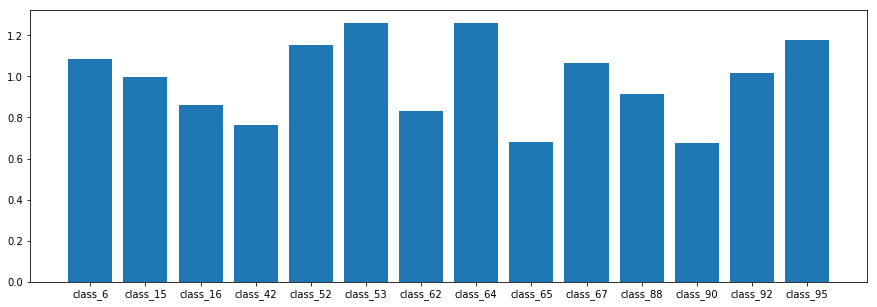

In [64]:
plt.figure(figsize=(15, 5))
plt.bar(classes, weight)

In [67]:
weighted_preds = oof_blended_df[classes].values * weight
weighted_preds /= weighted_preds.sum(1)[:, None]

In [68]:
# w/ weight
multi_weighted_logloss(oof_blended_df.reset_index().target.values, weighted_preds)

0.4390024482423558

In [69]:
# weight を適用
weighted_blended_values = blended_df.values * weight
weighted_blended_values /= weighted_blended_values.sum(1)[:, None]

In [70]:
blended_df.sum(1)

object_id
13           1.0
14           1.0
17           1.0
23           1.0
34           1.0
35           1.0
43           1.0
50           1.0
60           1.0
69           1.0
88           1.0
96           1.0
106          1.0
114          1.0
115          1.0
116          1.0
130          1.0
142          1.0
147          1.0
151          1.0
168          1.0
171          1.0
173          1.0
176          1.0
184          1.0
186          1.0
195          1.0
198          1.0
204          1.0
211          1.0
            ... 
130787078    1.0
130787121    1.0
130787259    1.0
130787288    1.0
130787315    1.0
130787346    1.0
130787409    1.0
130787413    1.0
130787553    1.0
130787572    1.0
130787650    1.0
130787683    1.0
130787746    1.0
130787754    1.0
130787792    1.0
130787808    1.0
130787817    1.0
130787819    1.0
130787871    1.0
130787879    1.0
130787887    1.0
130787903    1.0
130787932    1.0
130787944    1.0
130787965    1.0
130787966    1.0
130787971    1.0
1307

In [71]:
weighted_blended_df = blended_df.copy()
weighted_blended_df.loc[:, :] = weighted_blended_values

In [72]:
weighted_blended_df

,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95
object_id,,,,,,,,,,,,,,
13,0.000000,0.002146,0.000000,0.840747,0.131512,0.000000,0.012171,0.000444,0.000000,0.000693,0.000378,0.008818,0.000000,0.003091
14,0.000000,0.201134,0.000000,0.172668,0.205113,0.000000,0.100988,0.006133,0.000000,0.032323,0.006409,0.252400,0.000000,0.022833
17,0.000000,0.029140,0.000000,0.083835,0.114888,0.000000,0.041065,0.184445,0.000000,0.132713,0.013911,0.378006,0.000000,0.021996
23,0.000000,0.003328,0.000000,0.055446,0.040572,0.000000,0.092619,0.006152,0.000000,0.468656,0.002544,0.297437,0.000000,0.033246
34,0.000000,0.002207,0.000000,0.045404,0.159787,0.000000,0.009760,0.001749,0.000000,0.009295,0.001188,0.743996,0.000000,0.026615
35,0.000000,0.008109,0.000000,0.058638,0.068332,0.000000,0.032096,0.006593,0.000000,0.092350,0.002811,0.452165,0.000000,0.278905
43,0.000000,0.004425,0.000000,0.070230,0.126239,0.000000,0.112399,0.020481,0.000000,0.241429,0.003053,0.400762,0.000000,0.020980
50,0.000000,0.010527,0.000000,0.025130,0.070459,0.000000,0.026683,0.424574,0.000000,0.054029,0.003575,0.361445,0.000000,0.023579
60,0.000000,0.002947,0.000000,0.030557,0.018179,0.000000,0.032957,0.002741,0.000000,0.233531,0.001300,0.518394,0.000000,0.159393


### class99

In [75]:
weighted_blended_df = pd.read_csv('../submissions/taguchi_weighted_blended_nn-5_lgbm-5_0.4390.csv.gz', compression='gzip')

In [76]:
res = weighted_blended_df[classes].values

preds_99 = np.ones((res.shape[0]))
for i in range(res.shape[1]):
    preds_99 *= (1 - res[:, i])
    
preds_99 = 0.14 * preds_99 / np.mean(preds_99)
preds_99

array([0.07562991, 0.18538398, 0.18010212, ..., 0.16764988, 0.10674476,
       0.16886254])

In [77]:
weighted_blended_df['class_99'] = preds_99

In [78]:
new_classes = ['class_6', 'class_15', 'class_16', 'class_42', 'class_52', 'class_53', 'class_62', 'class_64', 'class_65', 'class_67', 'class_88', 'class_90', 'class_92', 'class_95', 'class_99']
sum_row =  weighted_blended_df[new_classes].sum(axis=1)

for _class in new_classes:
    weighted_blended_df[_class] = weighted_blended_df[_class] / sum_row
weighted_blended_df[new_classes].sum(axis=1)

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
7          1.0
8          1.0
9          1.0
10         1.0
11         1.0
12         1.0
13         1.0
14         1.0
15         1.0
16         1.0
17         1.0
18         1.0
19         1.0
20         1.0
21         1.0
22         1.0
23         1.0
24         1.0
25         1.0
26         1.0
27         1.0
28         1.0
29         1.0
          ... 
3492860    1.0
3492861    1.0
3492862    1.0
3492863    1.0
3492864    1.0
3492865    1.0
3492866    1.0
3492867    1.0
3492868    1.0
3492869    1.0
3492870    1.0
3492871    1.0
3492872    1.0
3492873    1.0
3492874    1.0
3492875    1.0
3492876    1.0
3492877    1.0
3492878    1.0
3492879    1.0
3492880    1.0
3492881    1.0
3492882    1.0
3492883    1.0
3492884    1.0
3492885    1.0
3492886    1.0
3492887    1.0
3492888    1.0
3492889    1.0
Length: 3492890, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82f7e6a160>,
      dtype=object)

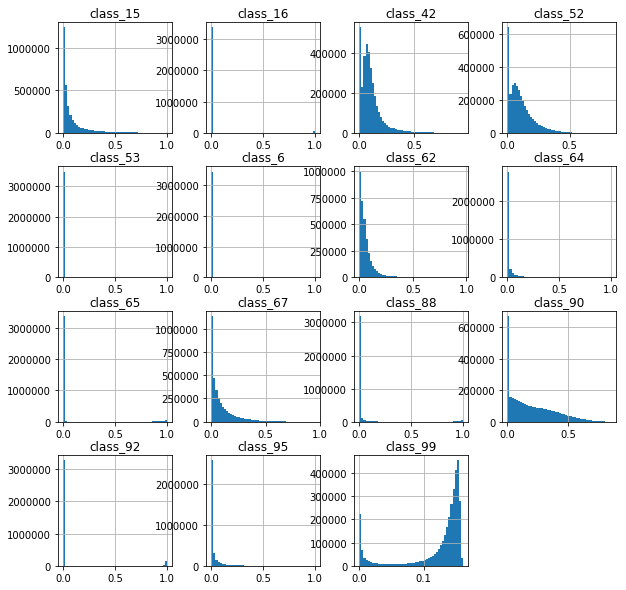

In [412]:
weighted_blended_df.hist(figsize=(10, 10), bins=50)

In [79]:
#weighted_blended_df.to_csv('../submissions/taguchi_weighted_blended_nn-5_lgbm-5_0.4685.csv.gz', index=True, compression='gzip')
weighted_blended_df.to_csv('../submissions/taguchi_weighted_blended_nn-5_lgbm-5_0.4390_with99.csv.gz', index=True, compression='gzip')

In [74]:
oof_blended_df.to_pickle('../oof/taguchi_weighted_blended_nn-5_lgbm-5_0.4390.pkl.gz', compression='gzip')